In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/SMSSpamCollection',sep='\t',names=['labels','text'])

In [ ]:
df

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [ ]:
x=df['text']
y=df['labels']

In [ ]:
xnew=tfidf.fit_transform(x)

In [ ]:
xnew

<5572x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [ ]:
x.shape

(5572,)

In [ ]:
xnew.shape

(5572, 8713)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xnew,y,random_state=0,test_size=0.25)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train.toarray(),y_train)

GaussianNB()

In [ ]:
ypred=nb.predict(x_test.toarray())

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


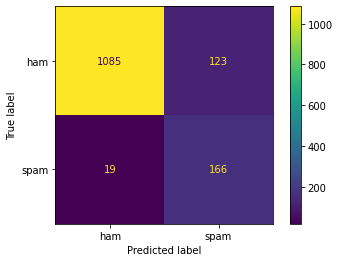

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,ypred)

In [ ]:
from sklearn.metrics import accuracy_score , classification_report

In [ ]:
accuracy_score(y_test,ypred)

0.8980617372577172

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         ham       0.98      0.90      0.94      1208
        spam       0.57      0.90      0.70       185

    accuracy                           0.90      1393
   macro avg       0.78      0.90      0.82      1393
weighted avg       0.93      0.90      0.91      1393



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lp=LogisticRegression()
lp.fit(x_train,y_train)

LogisticRegression()

In [ ]:
ypred2=lp.predict(x_test)

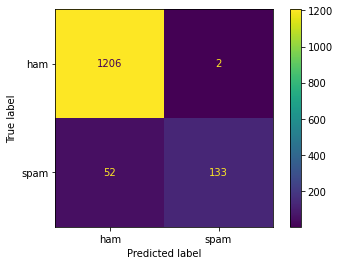

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,ypred2)

In [ ]:
accuracy_score(y_test,ypred2)

0.9612347451543432

In [ ]:
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1208
        spam       0.99      0.72      0.83       185

    accuracy                           0.96      1393
   macro avg       0.97      0.86      0.90      1393
weighted avg       0.96      0.96      0.96      1393

